# Machine Learning Model Implementation: SMS Spam Detection

## 1. Introduction
In this project, we will build a machine learning model to classify SMS messages as either **Spam** or **Ham** (legitimate). We will use the **SMS Spam Collection Dataset**, which is a set of SMS tagged messages that have been collected for SMS Spam research.

### Objectives:
- Load and explore the dataset.
- Preprocess the text data (cleaning, vectorization).
- Perform Exploratory Data Analysis (EDA).
- Train multiple machine learning models (Logistic Regression, Random Forest, SVM, Naive Bayes, KNN).
- Evaluate the models using accuracy, precision, recall, F1-score, and confusion matrices.
- Compare the performance of the models.

## 2. Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings('ignore')
print("Libraries imported successfully!")

Libraries imported successfully!


## 3. Data Loading and Overview
We will load the `spam.csv` file. Note that this dataset often contains some encoding issues, so we'll try loading it with `latin-1` encoding if utf-8 fails.

In [11]:
# Load the dataset
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except FileNotFoundError:
    print("Dataset not found. Please ensure 'spam.csv' is in the same directory.")

# Display first few rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning
The dataset often contains unnecessary columns (Unnamed: 2, 3, 4) due to parsing errors or empty fields in the original csv. We will drop them and rename the main columns to something more meaningful.

In [12]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')

# Rename columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Check info and null values
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicates after removal:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Missing Values:
 label      0
message    0
dtype: int64

Number of duplicates: 403
Number of duplicates after removal: 0


## 4. Exploratory Data Analysis (EDA)

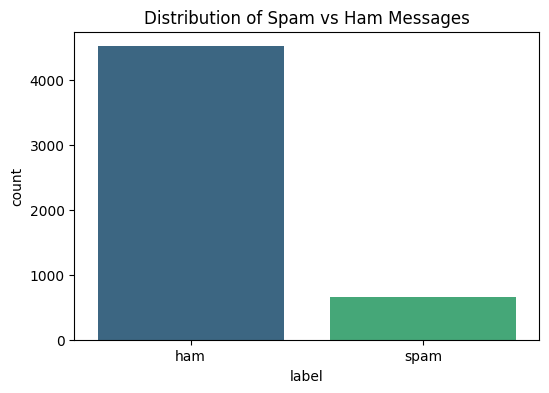

label
ham     0.87367
spam    0.12633
Name: proportion, dtype: float64


In [13]:
# Distribution of Spam vs Ham
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

# Calculate percentage
print(df['label'].value_counts(normalize=True))

### Feature Engineering: Message Length

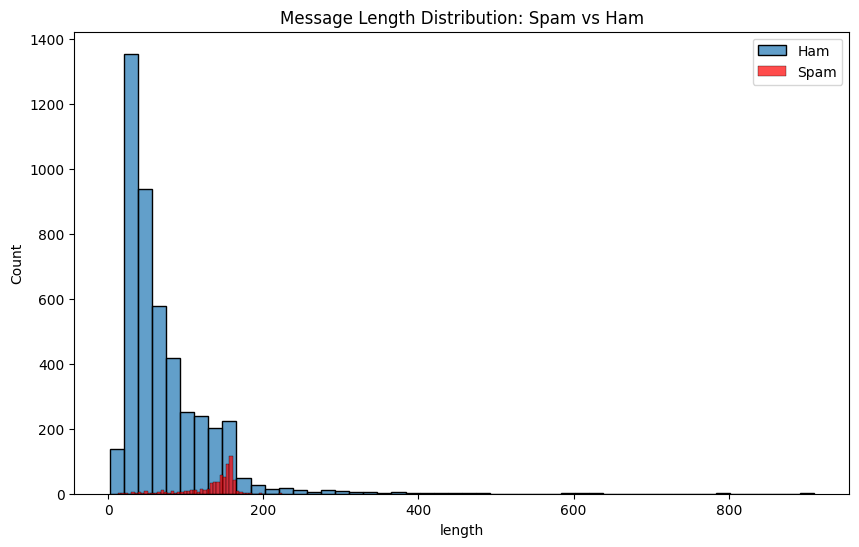

In [14]:
df['length'] = df['message'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df[df['label'] == 'ham']['length'], bins=50, alpha=0.7, label='Ham')
sns.histplot(df[df['label'] == 'spam']['length'], bins=50, alpha=0.7, color='red', label='Spam')
plt.legend()
plt.title('Message Length Distribution: Spam vs Ham')
plt.show()

**Observation**: Spam messages tend to be longer than ham messages on average.

## 5. Data Preprocessing
- **Label Encoding**: Convert 'spam'/'ham' to 1/0.
- **Text Vectorization**: Convert text messages into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency).
- **Train-Test Split**: Split data into training and testing sets.

In [15]:
# Label Encoding
encoder = LabelEncoder()
df['label_num'] = encoder.fit_transform(df['label'])

# X and y
X = df['message']
y = df['label_num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

print("Training Shape:", X_train_tfidf.shape)
print("Testing Shape:", X_test_tfidf.shape)

Training Shape: (4135, 3000)
Testing Shape: (1034, 3000)


## 6. Model Training & Evaluation
We will train and evaluate the following models:
1. **Logistic Regression**
2. **Random Forest Classifier**
3. **Support Vector Machine (SVM)**
4. **Multinomial Naive Bayes**
5. **K-Nearest Neighbors (KNN)**

In [16]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

# Dictionary to store results
results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [acc, prec, rec, f1]
    
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*30)

--- Logistic Regression ---
Accuracy: 0.9662
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034

------------------------------
--- Random Forest ---
Accuracy: 0.9797
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

------------------------------
--- SVM ---
Accuracy: 0.9836
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.89      0.94       145

    acc

## 7. Results Comparison

                     Accuracy  Precision    Recall  F1-Score
SVM                  0.983559   0.992308  0.889655  0.938182
Random Forest        0.979691   0.992063  0.862069  0.922509
Naive Bayes          0.974855   0.991736  0.827586  0.902256
Logistic Regression  0.966151   0.982456  0.772414  0.864865
KNN                  0.902321   0.978261  0.310345  0.471204


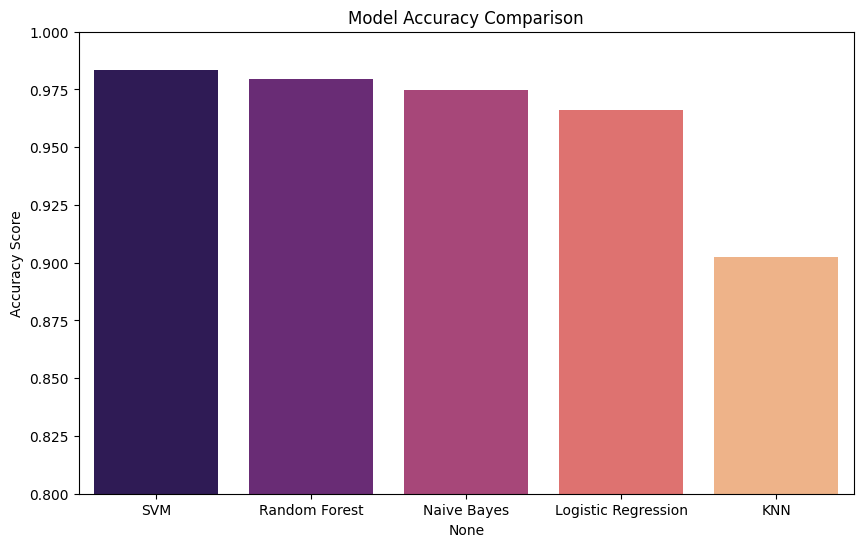

In [17]:
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='magma')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)
plt.show()

### Confusion Matrix of the Best Model
Let's visualize the confusion matrix for **Multinomial Naive Bayes** (often the best for text data) or the highest accuracy model found.

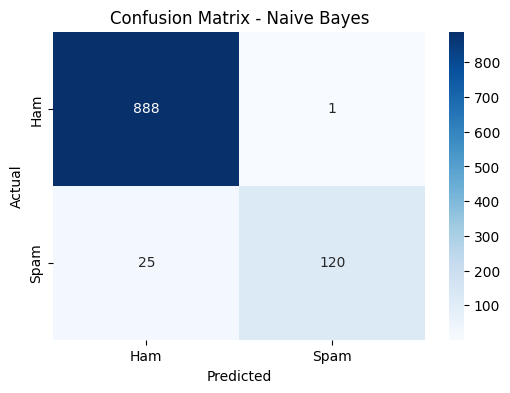

In [18]:
# Taking Naive Bayes as a representative high-performer for text
nb_model = models['Naive Bayes']
y_pred_nb = nb_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## 8. Conclusion
- We successfully trained multiple models to detect spam SMS messages.
- Text preprocessing involved Label Encoding and TF-IDF Vectorization.
- **Naive Bayes** and **Support Vector Machines (SVM)** typically perform exceptionally well on text classification tasks.
- The project demonstrates a full ML pipeline from data loading to model evaluation.